Soit $X$ un espace métrique complet dont la distance est notée $d$. Dans le cadre de la synthèse d'image, $X$ est un rectangle fermé de $\mathbb{R}^2$ muni de la distance usuelle, qui représente l'écran de l'ordinateur sur lequel on va afficher les formes fractales.

Soit $\mathscr{K}$ l'ensemble des parties compactes non vides de $X$. On définit une application $h$ de $\mathscr{K} \times \mathscr{K}$ dans $\mathbb{R}_{+}$par
$$
h(A, B)=\max \left\{\sup _{x \in A} \inf _{y \in B} d(x, y), \sup _{x \in B} \inf _{y \in A} d(x, y)\right\},
$$
On définit $\inf _{y \in B} d(x, y)=d(x,B)$

**Dev1 :** l'application $h$ est une distance sur $\mathscr{K}$, appelée distance de Hausdorff. 

**Pve :** On a d'abord clairement $h(A,B)=h(B,A)$. D'autre part, si on a $h(A,B)=0$, alors $\forall x \in A , \inf _{y \in B} d(x, y)=d(x,B)=0$, Comme $B$ est compact, $x \in B$. On a donc $A \subset B$, et, par symétrie, $B \subset A$, donc $A=B$.

Dans notre application, $\mathscr{K}$ correspond à l'ensemble de toutes les «images» noir et blanc affichables à l'écran. La distance $h$ fournit une mesure de la ressemblance entre deux images.
On montre alors la proposition suivante que l'on admettra :

**Prop1 (admis) :** $(\mathscr{K}, h)$ est un espace métrique complet.

Soient maintenant $N(\geq 2)$ fonctions contractantes de $X$ dans lui-même, $\left(w_n\right)_{n=1, \ldots, N}$. Il existe donc $N$ réels $\left(r_n\right)_{n=1, \ldots N}$ avec $0<r_n<1$, tels que
$$
\forall(x, y) \in X \times X, \quad d\left(w_n(x), w_n(y)\right) \leq r_n d(x, y) .
$$

On dit que le couple $\left(X,\left(w_n\right)_{n=1, \ldots, N}\right)$ forme un Système de Fonctions Itérées (SFI).

On définit une application $W$ de $\mathscr{K}$ dans lui-même de la façon suivante :
$$
\forall A \in \mathscr{K}, \quad W(A)=\bigcup_{n=1}^N w_n(A),
$$
où, par définition, $w_n(A)=\left\{w_n(x), x \in A\right\}$.
Un ensemble $E \in \mathscr{K}$ tel que $W(E)=E$ est appelé un attracteur du SFI. La propriété fondamentale qui nous intéresse ici est que tout SFI possède un unique attracteur.

**Thm1 :** Soit $\left(X,\left(w_n\right)\right)$ un SFI. Alors il existe un unique $E \in \mathscr{K}$ tel que
$$
E=\bigcup_{n=1}^N w_n(E) .
$$
Cette égalité signifie que $E$ est «fractal » au sens où il est égal à l'union d'un nombre fini de copies réduites de lui-même par les $w_n$.
De plus, quel que soit $A \in \mathscr{K}$, la suite $W^k(A)$ converge vers $E$ dans $\mathscr{K}$ au sens de la distance $h$ quand $k \rightarrow+\infty$, où $W^k$ désigne l'itérée d'ordre $k$ de $W$. Enfin, si $A \in \mathscr{K}$ est tel que $w_n(A) \subset A$ pour tout $n=1, \ldots, N$, alors
$$
E=\bigcap_{k=0}^{\infty} W^k(A) .
$$


**Pve :** $E$ est un point fixe de $W$, et $W$ est définie sur $X$ étant complet. Pour utiliser le thm du point fixe pour les applications contractantes dans un espace métrique complet, on montre que l'application $W$ est contractante : si $A$ et $B$ sont dans $\mathscr{K}$, alors $h(W(A), W(B)) \leq\left(\max _{1 \leq n \leq N} r_n\right) h(A, B)$. L'application $W$ est donc contractante, et comme $(\mathscr{K}, h)$ est complet, elle admet un unique point fixe.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w1= lambda x,y : np.array([0.5*x,0.5*y])+np.array([0,0.5])
w2= lambda x,y : np.array([0.5*x,0.5*y])+np.array([-0.5,-0.5])
w3= lambda x,y : np.array([0.5*x,0.5*y])+np.array([0.5,-0.5])

In [3]:
def frac(a):
    x=np.linspace(-1,1,5)
    y=np.linspace(-1,1,5)
    L=[[i,j] for i in x for j in y]
    k=1
    while k<=a:
        L_=L
        L=[]
        x=[L_[i][0] for i in range (len(L_))]
        for i in range (len(x)) :
            L.append(w1(L_[i][0],L_[i][1]))
            L.append(w2(L_[i][0],L_[i][1]))
            L.append(w3(L_[i][0],L_[i][1]))
        
        k+=1
    return L

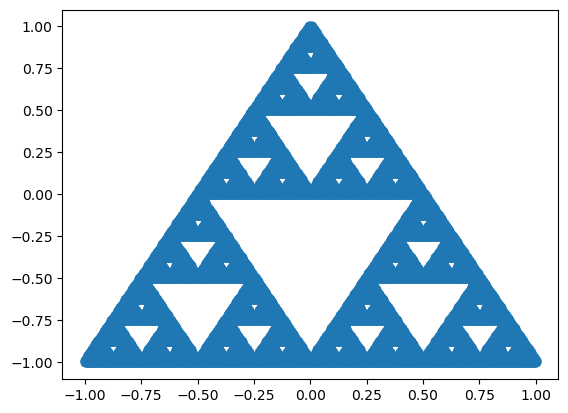

In [4]:
L=frac(7)
X=[L[i][0] for i in range (len(L))]
Y=[L[i][1] for i in range (len(L))]
plt.scatter(X,Y)

In [5]:
w1= lambda x,y : np.array([0.5*x,y])
w2= lambda x,y : np.array([0.5*x,y])+np.array([0.5,0])
def carr(a):
    x=np.linspace(0,0.5,20)
    y=np.linspace(0.5,1,20)
    L=[(i,2*i) for i in x]+[(i,-2*i+2) for i in y]
    k=0
    while k<a:
        L_=L
        L=[]
        for i in range (len(L_)) :
            L.append(w1(L_[i][0],L_[i][1]))
            L.append(w2(L_[i][0],L_[i][1]))
        k+=1
    return L     
        
                  
def tric(a):
    x=np.linspace(0,0.5,200)
    y=np.linspace(0.5,1,200)
    L=[(i,2*i) for i in x]+[(i,-2*i+2) for i in y]
    k=1
    L_=L
    L=[]
    while k<=a:
        for i in range (len(L_)) :
            print (len(L_))
            L.append(w1(L_[i][0],L_[i][1]))
            L.append(w2(L_[i][0],L_[i][1]))
        L_=[]
        print (L_)
        k+=1
    return L

In [6]:
w1= lambda x,y : np.array([0.5*x,y])
w2= lambda x,y : np.array([0.5*x,y])+np.array([0.5,0])
def carr(a):
    x=np.linspace(0,0.5,20)
    y=np.linspace(0.5,1,20)
    L=[(i,2*i) for i in x]+[(i,-2*i+2) for i in y]
    k=1
    while k<=a:
        L_=L
        L=[]
        for i in range (len(L_)) :
            L.append(w1(L_[i][0],L_[i][1]))
            L.append(w2(L_[i][0],L_[i][1]))
        k+=1
    return L  
        
                  
def tric(a):
    x=np.linspace(0,0.5,200)
    y=np.linspace(0.5,1,200)
    L=[(i,2*i) for i in x]+[(i,-2*i+2) for i in y]
    k=1
    while k<=a:
        L_=L
        L=[]
        for i in range (len(L_)) :
            L.append(w1(L_[i][0],L_[i][1]))
            L.append(w2(L_[i][0],L_[i][1]))
        k+=1
    return L

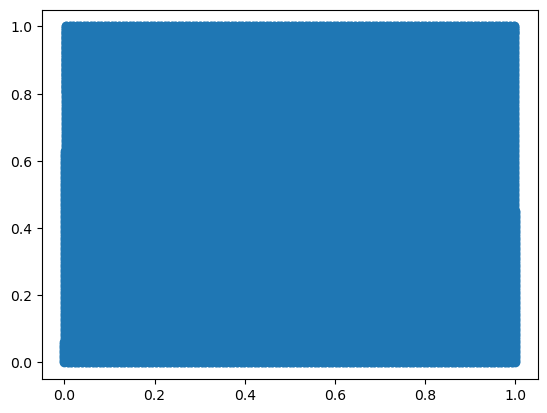

In [7]:
L=tric(7)
X=[L[i][0] for i in range (len(L))]
Y=[L[i][1] for i in range (len(L))]
plt.scatter(X,Y)

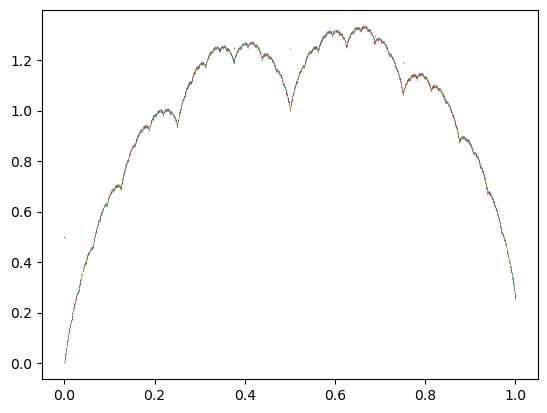

In [8]:
import random
d=0.5
a1=0.5
a2=0.5
e1=0
e2=0.5
f1=0
c1=1-0.25*d
f2=1
c2=-0.75-0.25*d
M1=np.array([[a1,0],[c1,d]])
M2=np.array([[a2,0],[c2,d]])
b1=np.array([e1,f1])
b2=np.array([e2,f2])

def w(n,x) :
    if n==1 :
         return M1@x+b1
    if n==2 :
         return M2@x+b2

p=np.array([0.5,0.5])
x0=np.array([0,0.5])
plt.plot(x0[0],x0[1], marker="_", markersize=0.7 )
for k in range(5000) :
    a=np.random.choice([1,2],p=p)
    x0=w(a,x0)
    plt.plot(x0[0],x0[1], marker="_", markersize=0.7 )

plt.show()